# Learn week embedding matrix
Use all the available actual data

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import sys
sys.path.append("../src/")
from collections import OrderedDict
import cellbell

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import utils

from models import week_embedding
from keras_tqdm import TQDMNotebookCallback
from IPython.display import SVG
from keras.utils.visualize_util import model_to_dot
from keras.optimizers import Adam, RMSprop, SGD
from keras.callbacks import Callback
from sklearn.model_selection import train_test_split

Using Theano backend.
Using gpu device 0: GeForce GT 630M (CNMeM is disabled, cuDNN not available)


In [3]:
data_file = "../data/processed/ensemble-data.h5"
actual = pd.read_hdf(data_file, "actual").dropna()

In [4]:
X = (actual["time"] % 100).as_matrix()
y = actual["actual"].as_matrix()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Embedding model

In [100]:
model = week_embedding(30)
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
embedding_18 (Embedding)         (None, 1, 30)         1620        embedding_input_18[0][0]         
____________________________________________________________________________________________________
flatten_18 (Flatten)             (None, 30)            0           embedding_18[0][0]               
____________________________________________________________________________________________________
activation_23 (Activation)       (None, 30)            0           flatten_18[0][0]                 
____________________________________________________________________________________________________
dense_47 (Dense)                 (None, 30)            930         activation_23[0][0]              
___________________________________________________________________________________________

In [101]:
model.compile(optimizer="adam", loss="mse")

In [102]:
history = model.fit(X_train, y_train,
                    batch_size=64, nb_epoch=20,
                    verbose=0,
                    callbacks=[
                        TQDMNotebookCallback()
                    ],
                    validation_data=(X_test, y_test),
                    shuffle=True)

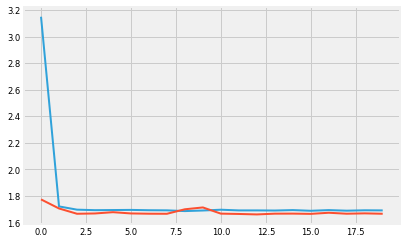

In [103]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

In [104]:
model.evaluate(X_test, y_test)

1760/1992 [=========================>....] - ETA: 0s

1.6667908272111271

In [105]:
emb = model.layers[0].weights[0].get_value()

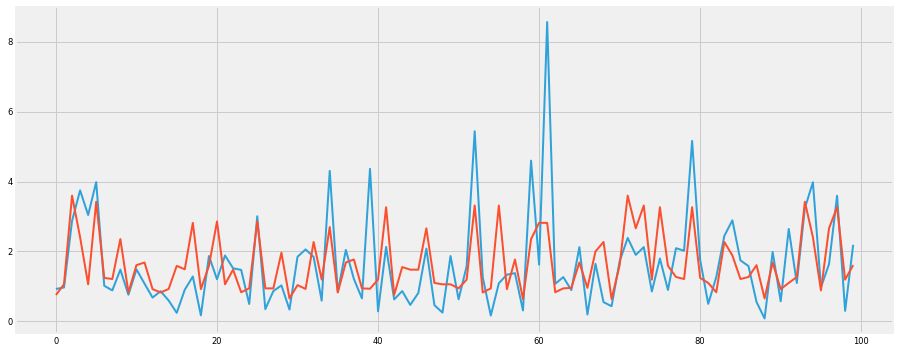

In [106]:
plt.figure(figsize=(14, 6))
plt.plot(y_test[400:500])
plt.plot(model.predict(X_test[400:500]))

## Save embeddings

In [108]:
np.save("../data/processed/week_embeddings", emb)